In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture

In [3]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
targetDir = "../data/output/result/"
speedDir = "../data/output/speed/"

## Browse all data

In [5]:
df = pd.read_csv(speedDir + "result.csv")

### Conditions
```
Speed < 10 => stop
Speed > 10 and Speed < 30 => green
Speed > 30 and Speed < 60 => yellow
Speed > 60 => red
```

 ### Grid size
 40 $\times$ 40 = 1600

In [6]:
df = df[['red', 'yellow', 'green', 'stop']]
df.describe()

,red,yellow,green,stop
count,1600.000000,1600.000000,1600.000000,1600.000000
mean,2.986250,17.277500,8.573125,15.496875
std,16.837146,61.349504,48.958569,125.961473
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,188.000000,543.000000,709.000000,2380.000000


In [7]:
len(df[df['red'] + df['yellow'] + df['green'] + df['stop'] == 0])

1406

## Take out fields that contains one or more markers

In [8]:
availables = df[df['red'] + df['yellow'] + df['green'] + df['stop'] > 0]

In [9]:
availables.describe()

,red,yellow,green,stop
count,194.000000,194.000000,194.000000,194.000000
mean,24.628866,142.494845,70.706186,127.809278
std,42.578259,115.097312,124.268434,342.086072
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,36.750000,0.000000,0.000000
50%,3.000000,136.500000,5.000000,1.000000
75%,26.750000,218.500000,94.750000,26.500000
max,188.000000,543.000000,709.000000,2380.000000


## Pair plot

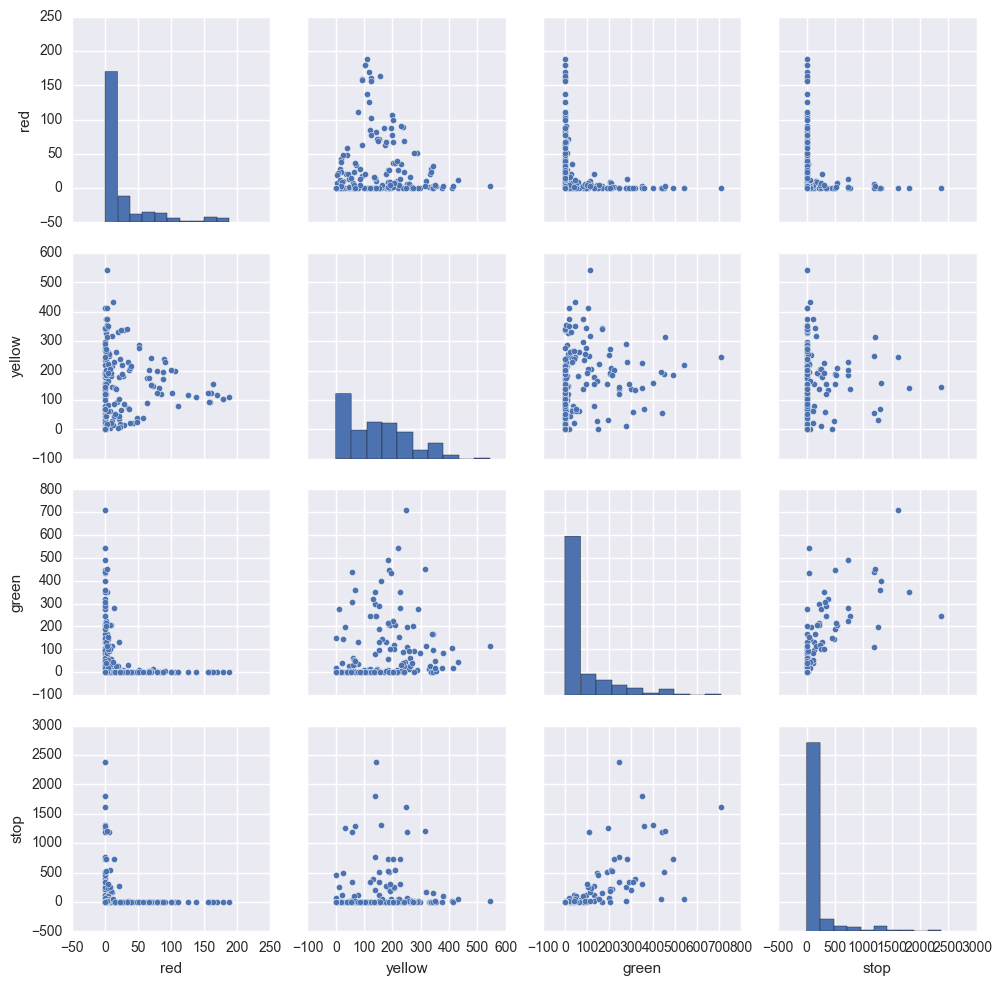

In [10]:
sns.pairplot(availables)

## Browse each features
1. Top 10
2. Histgram
3. count of field that has no markers of the feature

### Red

In [11]:
availables.sort_values('red', ascending=False)[:10]

,red,yellow,green,stop
1220,188,109,0,0
1181,179,104,0,0
1142,179,104,0,0
1103,170,116,0,0
1259,163,155,0,0
1064,161,123,0,0
986,159,94,0,0
1025,158,94,0,0
1295,156,125,0,0
947,138,111,0,0


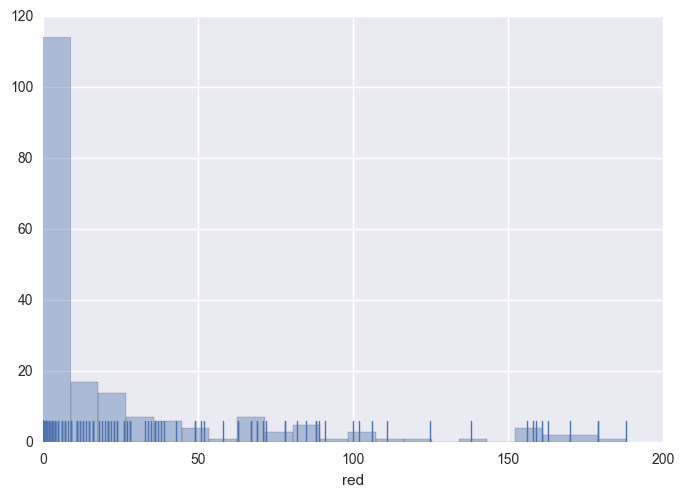

In [12]:
sns.distplot(availables["red"], kde=False, rug=True)

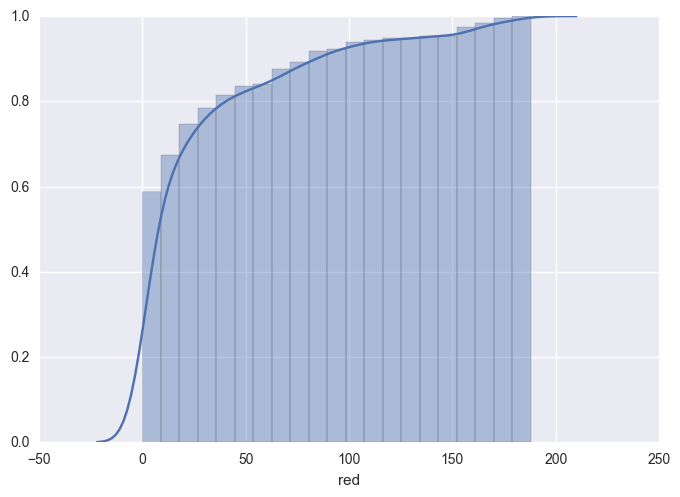

In [13]:
sns.distplot(availables["red"], 
             hist_kws=dict(cumulative=True), 
             kde_kws=dict(cumulative=True))

In [14]:
len(availables[availables["red"] == 0])

69

### Yellow

In [15]:
availables.sort_values('yellow', ascending=False)[:10]

,red,yellow,green,stop
1488,3,543,114,13
1367,12,432,44,55
449,3,413,18,7
103,0,412,104,11
882,3,377,84,107
142,1,374,17,1
1324,3,355,7,1
1325,5,352,17,8
418,3,350,48,11
407,3,345,168,144


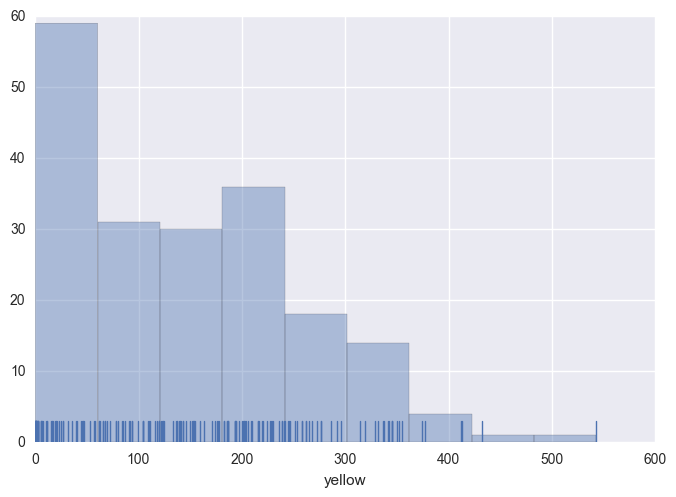

In [16]:
sns.distplot(availables["yellow"], kde=False, rug=True)

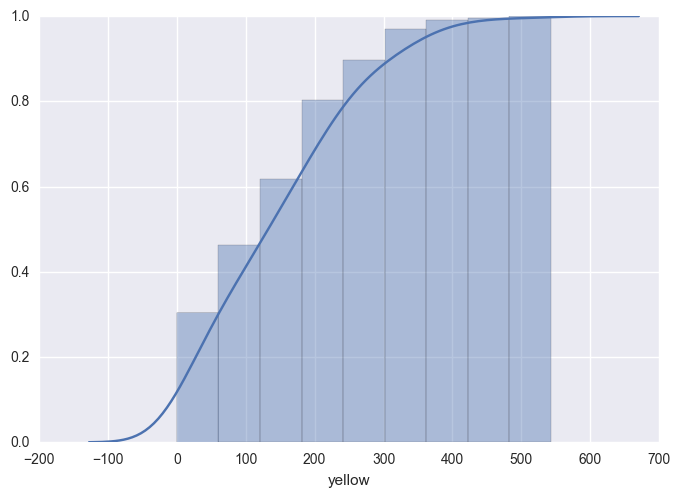

In [17]:
sns.distplot(availables["yellow"], 
             hist_kws=dict(cumulative=True), 
             kde_kws=dict(cumulative=True))

In [18]:
len(availables[availables["yellow"] == 0])

7

### Green

In [19]:
availables.sort_values('green', ascending=False)[:10]

,red,yellow,green,stop
1528,0,247,709,1609
586,0,220,543,43
454,0,186,489,729
1326,3,314,453,1214
406,0,187,448,509
841,0,57,439,1197
453,0,194,435,47
874,0,159,398,1307
955,0,68,358,1295
527,0,140,352,1802


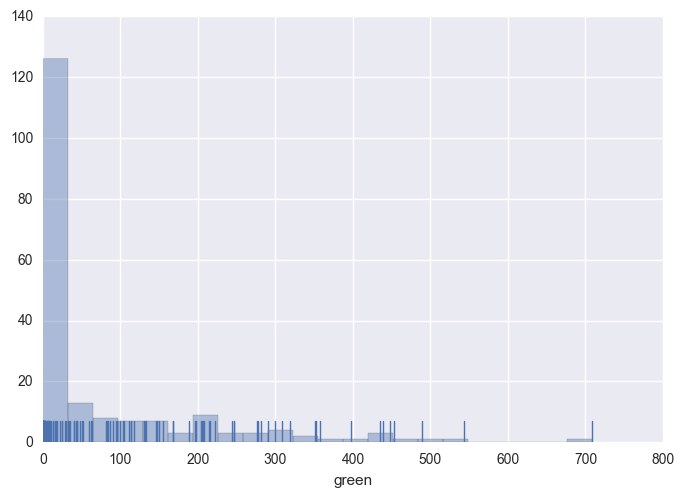

In [20]:
sns.distplot(availables["green"], kde=False, rug=True)

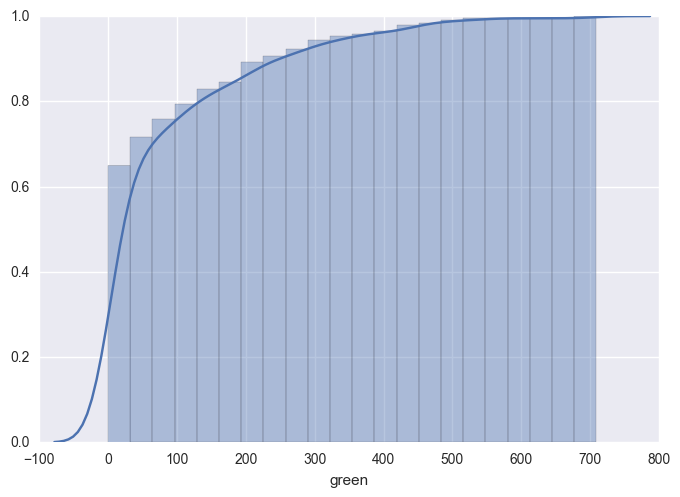

In [21]:
sns.distplot(availables["green"], 
             hist_kws=dict(cumulative=True), 
             kde_kws=dict(cumulative=True))

In [22]:
len(availables[availables["green"] == 0])

70

### Stop

In [23]:
availables.sort_values('stop', ascending=False)[:10]

,red,yellow,green,stop
1323,0,143,247,2380
527,0,140,352,1802
1528,0,247,709,1609
874,0,159,398,1307
955,0,68,358,1295
631,0,32,196,1264
1326,3,314,453,1214
841,0,57,439,1197
671,6,251,111,1187
688,0,137,246,763


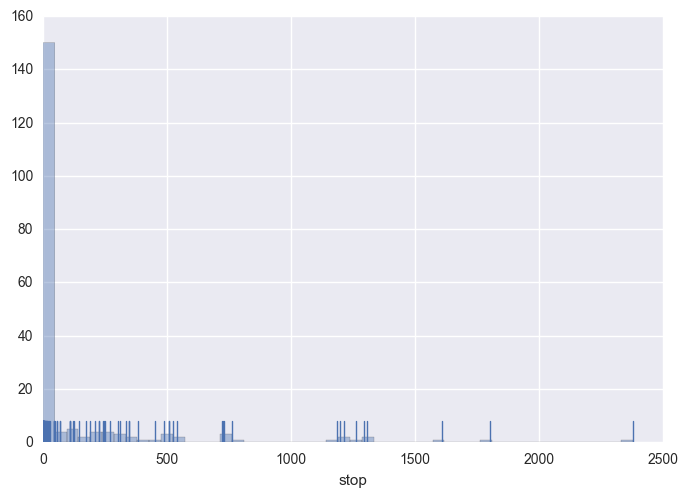

In [24]:
sns.distplot(availables["stop"], kde=False, rug=True)

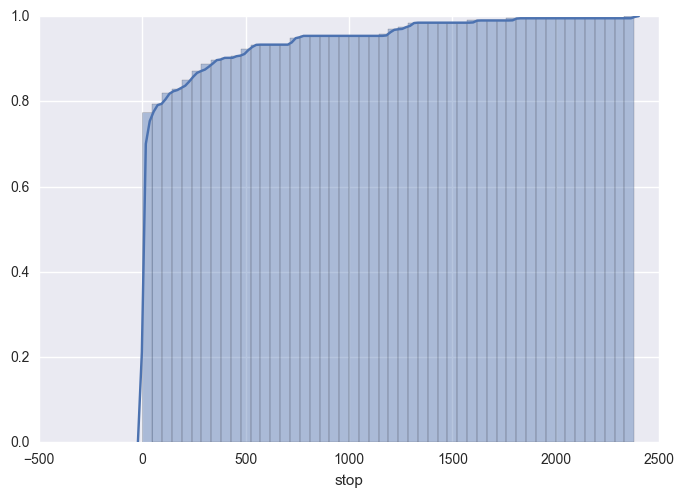

In [25]:
sns.distplot(availables["stop"], 
             hist_kws=dict(cumulative=True), 
             kde_kws=dict(cumulative=True))

In [26]:
len(availables[availables["stop"] == 0])

94

## Clustering by VBGMM

In [27]:
vb = BayesianGaussianMixture(n_components=7, weight_concentration_prior=0.001).fit(availables)
set(vb.predict(availables))

{0, 2, 3, 4, 5, 6}

In [28]:
pred = zip(availables.index, vb.predict(availables))
gridSize = len(df)
result = np.zeros(gridSize)

for index, klass in pred:
    result[index] = klass + 1
    
np.savetxt(targetDir + "clusters0.csv", result, delimiter=",", fmt="%d")